In [1]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from keras.models import Sequential
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
images = np.array(pickle.load(open('full_CNN_train.p', "rb")))
labels = np.array(pickle.load(open('full_CNN_labels.p', 'rb'))) / 255
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)
input_shape = X_train[0].shape

In [3]:
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(4, (3, 3), activation='relu'))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(UpSampling2D())
model.add(Conv2DTranspose(128, (3, 3), activation='relu'))
model.add(UpSampling2D())
model.add(Conv2DTranspose(64, (3, 3), activation='relu'))
model.add(Conv2DTranspose(32, (3, 3), activation='relu'))
model.add(Conv2DTranspose(16, (3, 3), activation='relu'))
model.add(UpSampling2D())
model.add(Conv2DTranspose(8, (3, 3), activation='relu'))
model.add(Conv2DTranspose(1, (3, 3), activation='relu'))

In [4]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 11487 samples, validate on 1277 samples
Epoch 1/10
11487/11487 [==============================] - 25s 2ms/step - loss: 0.0631 - acc: 0.8926 - val_loss: 0.0278 - val_acc: 0.9389
Epoch 2/10
11487/11487 [==============================] - 19s 2ms/step - loss: 0.0179 - acc: 0.9485 - val_loss: 0.0135 - val_acc: 0.9525
Epoch 3/10
11487/11487 [==============================] - 19s 2ms/step - loss: 0.0122 - acc: 0.9538 - val_loss: 0.0123 - val_acc: 0.9535
Epoch 4/10
11487/11487 [==============================] - 18s 2ms/step - loss: 0.0099 - acc: 0.9562 - val_loss: 0.0093 - val_acc: 0.9572
Epoch 5/10
11487/11487 [==============================] - 18s 2ms/step - loss: 0.0082 - acc: 0.9585 - val_loss: 0.0078 - val_acc: 0.9591
Epoch 6/10
11487/11487 [==============================] - 18s 2ms/step - loss: 0.0072 - acc: 0.9595 - val_loss: 0.0072 - val_acc: 0.9593
Epoch 7/10
11487/11487 [==============================] - 18s 2ms/step - loss: 0.0064 - acc: 0.9603 - val_loss: 0.0064 - val_acc:

[]

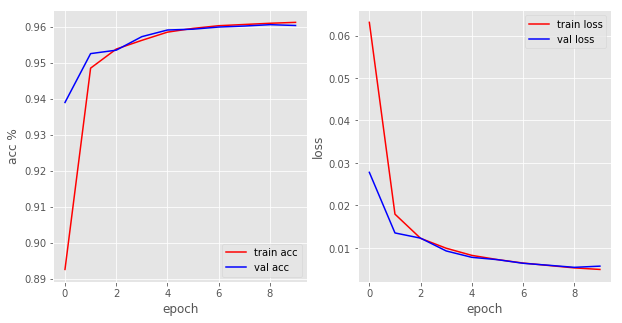

In [5]:
plt.figure(figsize=[10,5])
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], c='r', label='train acc')
plt.plot(history.history['val_acc'], c='b', label='val acc')
plt.xlabel('epoch')
plt.ylabel('acc %')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], c='r', label='train loss')
plt.plot(history.history['val_loss'], c='b', label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.plot()

In [6]:
prediction = model.predict(X_test, batch_size=128, verbose=1)

1277/1277 [==============================] - 1s 718us/step


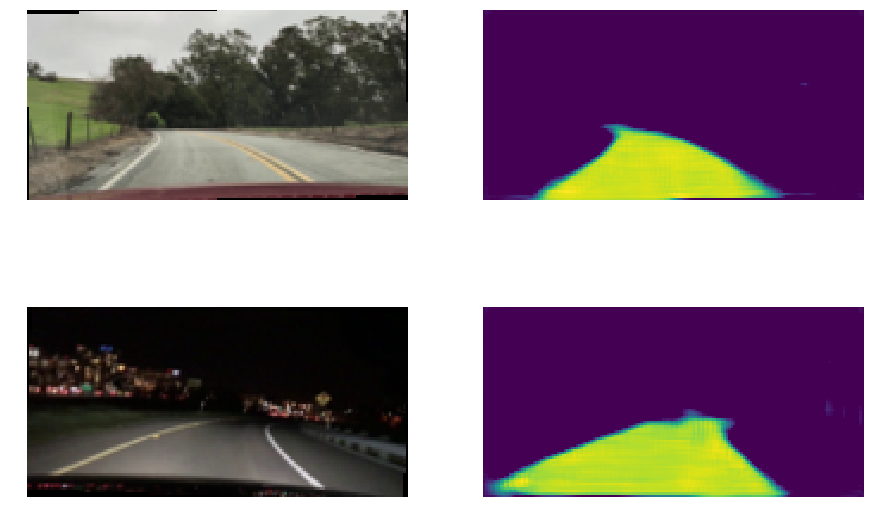

In [7]:
plt.figure(figsize=[15,10])
plt.subplot(2, 2, 1)
plt.imshow(X_test[100])
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(prediction[100][:, :, 0])
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(X_test[200])
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(prediction[200][:, :, 0])
plt.axis('off')

plt.show()